<h1><center>Final Case Study: Predicting Anonymized Data with Machine Learning</center></h1>
<h3><center>Steven Cocke, Hannah Kosinovsky, Tanvi Arora</center></h3>
<h3><center>December 6th, 2019</center></h3>

## 1 Introduction

The goal of this project is to help our business partner predict a response variable that he has indicated. In the dataset provided, there is no explanation of what the explanatory variables represent, where the data comes from, or what influences the response variable in a business sense. The data is completely anonymized. Still, the partner expects a machine learning algorithm as a deliverable to predict the values of the target variable. 

This may seem unreasonable, but in fact, this is a common applied business analytics problem. Many companies hire contractors or even post their projects on open source project competitions like Kaggle. These companies cannot disclose propriotary information, so they instead use anonymization techniques to hide the actual information within the data tables. It is up to the data scientist to use applied machine learning to fit a model without any business understanding of the data or prior knowledge or intuition about what outcomes they expect from the target variable. 

## 2 Methods

### 2.1 Exploratory Data Analysis



**About the Data received**
<a id="eda_report"></a>
<div style="text-align: right"><a href="#eda_code">Link to Code</a></div>

We have received 160000 observations with a 50 features and 1 binary target variable. 

Null check : All features have a few nulls. Overall number of records having any null values form only 1% of the total observations received.

Data Type : Our of 50 features, 5 features are of type 'object' i.e. string/text while others are floats. 

Duplicates : There were no duplicate observations received.

Correlations : Since nothing is known about the features, we started looking at the relationships between the variables. In order to do this we began by creating a color coded correlation plot. In this plot, the squares ar dark blue if there is no correlation and dark red if they are perfectly correlated. As expected, the same variables are perfectly correlated with each other so the diagonal line is dark red, but we found from the plot that the variables x2 and x6 are perfectly correlated as well as x38 and x41. This could mean that perhaps the variables represent the same information and having both in a model would be unhelpful.

Target Variable : Binary values i.e. only '0' or '1'. We see about 60% of observations have a target response as '0' and 40% have a target response as '1'. We can say our target is fairly balanced.



**Data Cleaning**
<a id="datacleanreport"></a>
<div style="text-align: right"><a href="#datacleancode">Link to Code</a></div>

- Categorical Variables :
    
    - Column 'x24' seemed to have continent values. So we corrected the value 'euorpe' to 'europe'. We see that there are about 28 records with null values in this field. This number is very little as compared to the overall dataset. Hence we have replaced this with the most probable value which is the mode of the column i.e. 'asia'.
    - Column 'x29' seemed to have month values. To sync up the format, we converted 'Dev' to 'Dec' , 'January' to 'Jan' and 'sept.' to 'Sep' . We see that there are about 30 records with null values in this field. This number is very little as compared to the overall dataset. Hence we have replaced this with the most probable value which is the mode of the column i.e. 'July'.
    - Column 'x30' seemed to have week day values. So we corrected the value 'thurday' to 'thursday'. We see that there are about 28 records with null values in this field. This number is very little as compared to the overall dataset. Hence we have replaced this with the most probable value which is the mode of the column i.e. 'wednesday'.
    - Column 'x32' had percentages. So these are basically numerical values. For model calculations, we have  removed the percentage sign and converted this field to float
    - Column 'x37' has dollar amounts. So these are also numerical values. For model calculations, we have removed the dollar sign and converted this field to float. 
    
    We have performed one hot encoding for the final 3 categorical variables Column 'x24_mod' , 'x29_mod' and 'x30_mod'.
    
    Please Note , above data modifications for correcting the spellings, will not impact our analysis. But it provides better optics.
    

- Numerical Variables :

    - Besides the 45 original floats , we now have 2 additional float values from above data cleaning.
    - To better understand the data distribution, we performed scaling and plotted distributions for each of these columns. We can see that almost all of the features display normal distribution. The ones that showed spikes were actually the one-hot encoded categorical features having only '0' or '1'. Hence we performed imputation on the null values for these numerical features by replacing nulls with the mean value of the feature. 

###  2.2 Evaluation Criteria and General Approach  

Before we move on to the models, it is very important to clarify the evaluation criteria of our models. Based on our discussion with the client, Cost of Error is \\$100 for every False Positives i.e. we predicted a '1' when it is actually a '0' and \\$10 for every False Negatives i.e. we predicted a '0' when it is actually a '1'. While our aim is to reduce both these numbers, our priority is to reduce False Positives since these cost us heavily.

**AUC - ROC Curve**

AUC - ROC curve is a performance measurement for classification problem .ROC is a probability curve and AUC represents degree of measure of separability.It tells how much model is capable of distinguishing between classes of the target response. **_Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s._**

For example : When AUC is 0.7 , it means that there is 70% chance that model will be able to distinguish between positive class and negative class. 


###  2.3 Approach  

**Out-Of-Fold Dataset** . 
Machine Learning models that we will implement, will be split into K-Folds ( 5 fold ) of train and test data , it is like splitting our dataset into 5 equal groups and then assigning 1 group as an Out-Of-Fold(OOF) Dataset, we will train our model using the remaining 4 groups. We will then predict the values of the OOF dataset.ROC_AUC score of the OOF dataset will be used to evaluate our model.

**RandomSearchCV**
To improve our models, we hyper tune its parameters. We used RandomSearchCV to have better performance and used StratifiedKFold Split for Cross validations. As discussed above, we want to prioritize reducing False Positives over False Negatives. Hence for scoring, we first try precision_score , which should limit the number of false positives ,then the recall_score. We use 70% of our dataset for training the model from RandomSearchCV and then use remaining 30% to test for False Positives and False Negatives. It provides us with the parameter values of the model with best performance ( score ), in our case is 'precision'.

 We then perform Out-Of-Fold test on the best model returned . This model is hence trained on CrossValidated dataset of 5 Folds. We predict the entire dataset using this final model to calculate our loss
 
**Calculation of loss**
Total loss = ( FalsePositives from entire dataset prediction * \\$100 + FalseNegatives from entire dataset prediction * \\$10 )



### 3 Models and Results

#### 3.1 Logistic Regression Classifier
<a id="logregresults"></a>
<div style="text-align: right"><a href="#logregcode">Link to Code</a></div>

The first model we explored was Logistic Regression. We decided to start with this model because we know that the response variable is binary, but unlike other machine learning algorithms, the inputs are easily understandable and explainable to a non-technical audience. 

We tried about 4 different versions of Logistic Regression using the out-of-fold dataset , and have received ROC score of about 0.76.  There is clearly scope of improvement so we tried other algorithms that can boost the output.

#### 3.2 Random Forest Classifier
<a id="randomforestresults"></a>
<div style="text-align: right"><a href="#randomforestcode">Link to Code</a></div>

RandomForest Classifier is an ensemble algorithm. It creates a set of decision trees from randomly selected subset of training set and aggregates the votes from different decision trees to decide the final class of the test object. 
Because of this , random forest tends to perform better for classification tasks. However we need to be careful that our model does not overfit. 

Our base random classifier model with default parameters, gave a ROC_AUC score of 0.95 which is very good. However we performed a randomsearchCV on this base classifier .The best model received improved ROC_AUC score to 0.97. Using this hyper tuned Random Forest model, gave us a loss of approx **$100K** when used to predict the entire dataset.

#### 3.3 XGBoost Classifier
<a id="xgboostresults"></a>
<div style="text-align: right"><a href="#xgboostcode">Link to Code</a></div>

After a low accuracy score with logistic regression and a potential overfit problem in our random forest classification, we decided to try XGBoost Classifier. 

Base XGBoost model with defaults had a ROC_AUC score of 0.91. On using this on to predict target response on entire dataset , we got a loss of $1.1M . So we tried to tune this model. We added n_estimators = 400. This further improved the ROC_AUC score to 0.94  and gave us a loss of \\$800K . Adding more parameters , leraning rate as 0.1 and max_depth of 15 ,  The model returned gave a ROC_AUC score of 0.98 on the OOF Dataset. When this model was used to predict the entire dataset, it gave us a loss of \\$0. 

While loss of \\$0 sounds great it has a risk of overfitting. So we will go with the second best model here that gave us a loss of \\$800K.

#### 3.4 LightGBM Classifier
<a id="lgbresults"></a>
<div style="text-align: right"><a href="#lgbcode">Link to Code</a></div>

LightGBM is another classification algorithm. We want to check if this model outperforms the other models used so far. We obtained 2 set of parameters for the best model using RandomSearchCV. The best model in both the cases when run using OOF Dataset , gave a ROC_AUC score of 0.98. The loss incurred by first model with more defined parameters was \\$132K . Seems like the model was a overfit. The other model performed better as the loss incurred was \\$82.8K Score is close to what we obtained in RandomForest although slightly on the higher end. Trade of was the RandomsearchCV which took long to run. 



<a id="votingresults"></a>
<div style="text-align: right"><a href="#votingcode">Link to Code</a></div>

#### 3.5 Ensemble Model using Voting Classifier on above Models

## 4 Conclusions


## References

https://mlfromscratch.com/gridsearch-keras-sklearn/  
https://stackoverflow.com/questions/579310/formatting-long-numbers-as-strings-in-python  

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62  
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5  



## Code

In [111]:
import os, fnmatch
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from sklearn.model_selection import KFold

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

#warnings.filterwarnings(action='ignore', category=DataConversionWarning)


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


<a id="eda_code"></a>
<div style="text-align: right"><a href="#eda_report">Back to EDA Report</a></div>

### Exploratory Data Analysis



In [8]:
#data_df = pd.read_csv('final_project.csv')  
data=pd.read_csv('../../final_project.csv')
data_df=data.copy()
data_df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [9]:
data_df[['x0','x1','x2','x3','x4','x5','x6','x7','x8']].describe(include='all',)

,x0,x1,x2,x3,x4,x5,x6,x7,x8
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831


In [10]:
data_df[['x9','x10','x11','x12','x13','x14','x15','x16','x17']].describe(include='all',)


,x9,x10,x11,x12,x13,x14,x15,x16,x17
count,159970.000000,159957.000000,159970.000000,159964.000000,159969.000000,159966.000000,159965.000000,159974.000000,159973.000000
mean,0.005462,0.002253,0.030232,-1.334402,0.007669,0.008104,0.001215,0.006223,0.012040
std,6.355040,7.871429,8.769633,14.750990,8.953837,6.964097,3.271779,4.984065,7.569351
min,-27.980659,-36.306571,-38.092869,-64.197967,-38.723514,-30.905214,-17.002359,-26.042983,-34.395898
25%,-4.260619,-5.288196,-5.903274,-11.379492,-6.029945,-4.696755,-2.207774,-3.344027,-5.071470
50%,0.006045,-0.018176,0.010941,-1.624439,-0.003473,0.002467,0.003535,0.012754,0.024541
75%,4.305734,5.331573,5.935032,8.374524,6.041959,4.701299,2.211660,3.366853,5.101962
max,27.377842,37.945583,36.360443,73.279354,42.392177,32.546340,13.782559,21.961123,37.057048


In [11]:
data_df[['x18','x19','x20','x21','x22','x23','x24','x25','x26','x27']].describe(include='all',)


,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27
count,159960.000000,159965.000000,159962.000000,159971.000000,159973.000000,159953.000000,159972,159978.000000,159964.000000,159970.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,asia,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,138965,NaN,NaN,NaN
mean,0.012694,0.024555,0.299074,-0.029137,0.008400,0.722028,NaN,-0.000806,-0.001066,-0.004159
std,4.540714,7.595316,5.806203,9.409635,5.412010,14.909127,NaN,1.263656,0.843258,6.774047
min,-20.198686,-35.633396,-26.677396,-43.501854,-23.644193,-66.640341,NaN,-6.364653,-3.857484,-32.003555
25%,-3.056131,-5.101553,-3.607789,-6.361115,-3.649766,-9.268532,NaN,-0.852784,-0.567293,-4.597919
50%,0.015904,0.044703,0.433055,-0.026385,0.011144,1.029609,NaN,-0.003723,-0.001501,0.037138
75%,3.073002,5.164732,4.306566,6.316457,3.672678,11.028035,NaN,0.851765,0.567406,4.649773


In [12]:
data_df[['x18','x19','x20','x21','x22','x23','x24','x25','x26','x27']].describe(include='all',)


,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27
count,159960.000000,159965.000000,159962.000000,159971.000000,159973.000000,159953.000000,159972,159978.000000,159964.000000,159970.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,asia,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,138965,NaN,NaN,NaN
mean,0.012694,0.024555,0.299074,-0.029137,0.008400,0.722028,NaN,-0.000806,-0.001066,-0.004159
std,4.540714,7.595316,5.806203,9.409635,5.412010,14.909127,NaN,1.263656,0.843258,6.774047
min,-20.198686,-35.633396,-26.677396,-43.501854,-23.644193,-66.640341,NaN,-6.364653,-3.857484,-32.003555
25%,-3.056131,-5.101553,-3.607789,-6.361115,-3.649766,-9.268532,NaN,-0.852784,-0.567293,-4.597919
50%,0.015904,0.044703,0.433055,-0.026385,0.011144,1.029609,NaN,-0.003723,-0.001501,0.037138
75%,3.073002,5.164732,4.306566,6.316457,3.672678,11.028035,NaN,0.851765,0.567406,4.649773


In [13]:
data_df[['x28','x29','x30','x31','x32','x33','x34','x35','x36','x37']].describe(include='all',)


,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37
count,159965.000000,159970,159970,159961.000000,159969,159959.000000,159959.000000,159970.000000,159973.000000,159977
unique,NaN,12,5,NaN,12,NaN,NaN,NaN,NaN,129198
top,NaN,July,wednesday,NaN,0.01%,NaN,NaN,NaN,NaN,$-415.46
freq,NaN,45569,101535,NaN,40767,NaN,NaN,NaN,NaN,6
mean,0.031543,NaN,NaN,-0.005945,NaN,-0.006567,-0.000426,0.000936,0.006453,NaN
std,14.439534,NaN,NaN,2.767508,NaN,1.747762,8.014180,2.379558,1.593183,NaN
min,-72.896705,NaN,NaN,-12.289364,NaN,-7.451454,-36.116606,-10.008149,-6.866024,NaN
25%,-9.702464,NaN,NaN,-1.874206,NaN,-1.183681,-5.401084,-1.610337,-1.068337,NaN
50%,0.244210,NaN,NaN,0.002013,NaN,-0.006079,-0.013089,-0.002399,0.003645,NaN
75%,9.936995,NaN,NaN,1.856369,NaN,1.179460,5.411667,1.603089,1.079895,NaN


In [14]:
data_df[['x38','x39','x40','x41','x42','x43','x44','x45','x46','x47']].describe(include='all',)


,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47
count,159969.000000,159977.000000,159964.000000,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000
mean,6.059130,0.004253,-2.316526,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622
std,16.891603,5.134322,17.043549,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157
min,-74.297559,-22.101647,-74.059196,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333
25%,-5.249882,-3.458716,-13.953629,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016
50%,6.184410,0.019068,-2.701867,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865
75%,17.420148,3.463308,8.981616,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028
max,90.467981,21.545591,88.824477,100.050432,22.668041,6.680922,19.069759,1.669205,150.859415,20.836854


In [15]:
data_df[['x48','x49','y']].describe(include='all',)


,x48,x49,y
count,159968.000000,159968.000000,160000.000000
mean,-0.000224,-0.674224,0.401231
std,1.935501,15.036738,0.490149
min,-8.490155,-65.791191,0.000000
25%,-1.320800,-10.931753,0.000000
50%,-0.011993,-0.574410,0.000000
75%,1.317703,9.651072,1.000000
max,8.226552,66.877604,1.000000


In [16]:
data_df.isnull().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

In [18]:
# To find duplicated rows in data Frame
data_df.duplicated().any()

False

In [19]:
import pandas as pd
import numpy as np

corr = data_df.corr()
corr.style.background_gradient(cmap='coolwarm')

<a id="datacleancode"></a>
<div style="text-align: right"><a href="#datacleanreport">Back to DataClean in Report</a></div>

### Data Cleaning

In [21]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in data_df.columns:
    if data_df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif data_df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass

#### Categorical Variables

In [22]:
categoricalVars


['x24', 'x29', 'x30', 'x32', 'x37']

In [23]:
data_df['x24'].unique()

array(['euorpe', 'asia', 'america', nan], dtype=object)

In [24]:
data_df[['x24','x0']].groupby(by='x24').count()

,x0
x24,
america,4468
asia,138943
euorpe,16535


In [25]:
data_df['x24_mod']=data_df['x24'].str.replace('euorpe','europe')

In [26]:
data_df[['x24_mod','x0']].groupby(by='x24_mod').count()

,x0
x24_mod,
america,4468
asia,138943
europe,16535


In [27]:
data_df.drop(['x24'],axis=1,inplace=True)

In [28]:
data_df['x29'].unique()

array(['July', 'Aug', 'Jun', 'May', 'sept.', 'Apr', 'Nov', 'Oct', nan,
       'Mar', 'Feb', 'Dev', 'January'], dtype=object)

In [29]:
data_df[['x29','x0']].groupby(by='x29').count()

,x0
x29,
Apr,6760
Aug,29401
Dev,23
Feb,140
January,9
July,45559
Jun,41325
Mar,1231
May,21933


In [30]:
data_df['x29_mod']=data_df['x29'].str.replace('Dev','Dec')
data_df['x29_mod']=data_df['x29_mod'].str.replace('January','Jan')
data_df['x29_mod']=data_df['x29_mod'].str.replace('sept.','Sep')
data_df[['x29_mod','x0']].groupby(by='x29_mod').count()

,x0
x29_mod,
Apr,6760
Aug,29401
Dec,23
Feb,140
Jan,9
July,45559
Jun,41325
Mar,1231
May,21933


In [31]:
data_df.drop(['x29'],axis=1,inplace=True)

In [32]:
data_df['x30'].unique()

array(['tuesday', 'wednesday', 'thurday', 'monday', 'friday', nan],
      dtype=object)

In [33]:
data_df[['x30','x0']].groupby(by='x30').count()

,x0
x30,
friday,563
monday,488
thurday,29423
tuesday,27949
wednesday,101521


In [34]:
data_df['x30_mod']=data_df['x30'].str.replace('thurday','thursday')
data_df[['x30_mod','x0']].groupby(by='x30_mod').count()

,x0
x30_mod,
friday,563
monday,488
thursday,29423
tuesday,27949
wednesday,101521


In [35]:
data_df.drop(['x30'],axis=1,inplace=True)

In [36]:
data_df[data_df['x24_mod'].isna()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x44,x45,x46,x47,x48,x49,y,x24_mod,x29_mod,x30_mod
5210,-0.364025,-4.506393,7.645077,1.769922,0.231400,1.829309,11.115368,-55.655247,11.131349,2.011766,...,1.842917,-0.131755,95.250240,-5.674680,-2.154947,16.557514,0,NaN,Aug,wednesday
17289,0.095261,2.269817,-24.253134,-2.845433,4.954117,-10.505069,-35.262235,-9.976514,2.044493,-7.940039,...,-6.160344,-0.018488,-55.893460,-0.712872,1.711422,-9.651947,0,NaN,July,wednesday
17844,-0.207053,2.724775,-18.175997,4.497731,-3.377169,-2.518833,-26.426534,-3.396776,-9.075536,1.601223,...,-1.195425,-0.183835,-12.006483,0.148091,0.535122,20.698914,0,NaN,Apr,wednesday
18156,-0.146275,-5.968589,-9.476670,2.989144,-10.822999,5.995066,-13.778367,47.008513,3.106208,-5.905345,...,-9.380888,-0.049281,-3.951209,4.465995,-0.172261,-2.926297,1,NaN,July,wednesday
22032,-0.429348,0.765252,-14.832546,-15.928468,17.620486,1.291650,-21.565408,-31.923220,7.257478,0.244056,...,1.242355,-0.544893,-10.028234,-4.628685,0.883964,0.120811,0,NaN,Aug,wednesday
25611,0.363907,-5.866806,9.807587,-10.114038,1.600764,15.689561,14.259494,14.035633,2.923251,0.936867,...,-4.767721,0.314672,-11.865159,9.102946,3.168309,-17.074937,1,NaN,Nov,wednesday
25820,-0.000706,1.932273,-3.883460,-3.087413,1.731789,7.089336,-5.646260,-7.953033,-5.464963,-12.015470,...,2.614520,-0.133935,-29.840013,6.165879,0.373030,0.955955,0,NaN,July,wednesday
27941,0.219924,-4.306307,-7.584208,12.796199,2.034315,0.194260,-11.026868,-13.176084,-4.033980,-10.816127,...,5.296026,-1.031128,56.317835,10.440011,1.831199,9.017663,1,NaN,July,thursday
31112,0.474457,4.397193,-21.771151,-9.642420,-1.720646,-0.331295,-31.653617,-73.341891,5.222198,12.713231,...,4.271317,-0.090800,-17.042971,-1.308712,0.752217,-7.953823,1,NaN,July,wednesday
33247,0.072650,-3.016108,-6.082486,17.605107,4.996767,9.097960,-8.843478,-14.650558,6.017444,-1.901501,...,8.011157,-0.207016,31.006420,9.086374,0.371348,12.280221,0,NaN,Jun,wednesday


Nulls in column 'x24_mod' are randomly null.Also these are a very little percentage of overall recordset. So we will impute this field with mode, which is 'asia'

In [37]:
data_df['x24_mod'].fillna(data_df['x24_mod'].mode().values[0], inplace=True)

In [38]:
data_df[['x24_mod','x0']].groupby(by='x24_mod').count()

,x0
x24_mod,
america,4468
asia,138971
europe,16535


In [39]:
data_df[data_df['x29_mod'].isna()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x44,x45,x46,x47,x48,x49,y,x24_mod,x29_mod,x30_mod
126,0.327565,-0.544186,-6.928746,-5.659393,-3.423373,-1.850306,-10.073876,-8.432450,24.492095,-5.653426,...,-1.511031,-0.057357,-69.130267,1.264002,0.317753,6.095717,0,asia,NaN,wednesday
1614,0.754582,3.547577,3.016391,-4.063511,-1.563541,-15.661289,4.385607,-12.233037,-2.419313,1.056685,...,-4.218491,0.498004,-49.001582,-6.910098,-3.504388,-44.130320,0,asia,NaN,thursday
9240,0.579893,12.543018,-5.603496,15.832023,1.864623,2.156928,-8.147063,-8.852715,4.015302,4.678308,...,-10.217638,0.377287,14.125822,-8.246789,1.320902,16.644843,0,asia,NaN,wednesday
20372,-0.195980,-5.278287,-20.016811,6.403927,1.489941,2.635308,-29.102939,-18.046966,-10.120454,5.964603,...,-11.764908,1.028098,-19.887005,-3.751193,0.257226,-8.863838,0,asia,NaN,wednesday
20593,-0.432698,-9.654119,2.720042,-2.764139,-6.009950,-12.373923,3.954736,-36.335471,13.942369,-8.018002,...,-4.636585,0.092541,-0.847529,3.039395,-2.345329,8.532281,0,asia,NaN,thursday
29277,-0.428899,6.310499,6.340049,8.930355,0.627894,-0.821358,9.217955,-27.398250,-0.995498,8.372324,...,-4.672900,0.664107,-20.989706,-0.492248,0.606860,-22.333572,0,asia,NaN,thursday
35972,-0.086555,-4.908538,1.795795,5.956340,8.803897,8.838533,2.610951,-8.189033,-2.319977,5.839300,...,7.276078,-0.262679,-32.757693,-1.471473,0.200874,-5.742735,0,asia,NaN,wednesday
40002,0.210420,-13.519009,3.846340,-14.798395,-5.916286,7.564040,5.592289,1.294469,2.182063,0.732065,...,-0.433112,0.395444,57.227899,-2.935692,-0.528141,22.120744,1,europe,NaN,wednesday
43631,-0.215826,-13.889697,-0.025508,-1.328942,0.732773,-6.126059,-0.037087,-36.410395,-0.087889,12.155512,...,1.882943,-0.297041,-29.678841,-1.148550,0.633554,-14.554421,0,asia,NaN,wednesday
49444,-0.564936,-2.354327,-11.152009,9.745600,7.046710,4.754754,-16.214183,27.783791,-3.054301,7.117610,...,-3.487854,0.482927,-62.107871,-1.602304,1.700965,-17.098522,0,asia,NaN,tuesday


Nulls in column 'x29_mod' are randomly null.Also these are a very little percentage of overall recordset. So we will impute this field with mode

In [40]:
data_df['x29_mod'].fillna(data_df['x29_mod'].mode().values[0], inplace=True)

In [41]:
data_df[['x29_mod','x0']].groupby(by='x29_mod').count()

,x0
x29_mod,
Apr,6760
Aug,29401
Dec,23
Feb,140
Jan,9
July,45589
Jun,41325
Mar,1231
May,21933


In [42]:
data_df[data_df['x30_mod'].isna()]

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x44,x45,x46,x47,x48,x49,y,x24_mod,x29_mod,x30_mod
3445,-0.340760,-2.731714,-4.051004,2.441978,-11.046551,-1.758981,-5.889856,-19.957167,0.084582,-5.734032,...,5.815358,0.430925,-27.691062,-6.136700,-0.085282,-10.257574,0,asia,Aug,NaN
8374,0.429505,-7.459912,-17.906603,4.674094,-4.583461,-0.382899,-26.034855,-3.191549,1.294169,-14.180300,...,0.965564,-0.306544,-27.828583,-6.664223,3.629359,-4.049267,0,asia,Jun,NaN
15130,0.328694,7.674332,6.788526,-1.347611,-12.896044,-7.931477,9.870007,14.200367,8.672637,11.690779,...,-5.302886,0.161060,28.124952,3.553745,0.678818,7.798503,1,asia,July,NaN
18824,-0.318803,-5.290016,5.254072,-1.634832,2.451151,5.456817,7.639027,-8.073148,4.939620,7.656725,...,-0.987262,-0.380483,-20.471174,-4.916719,-0.200977,20.692771,0,asia,Jun,NaN
23650,-0.080049,0.216630,-14.163302,1.314182,-0.414960,13.373517,-20.592376,28.640776,0.894628,2.724194,...,-2.914865,-0.304318,-18.943871,-4.425927,1.542899,-0.453366,0,asia,July,NaN
30794,0.312780,1.644305,2.548769,-8.338747,-7.784870,3.116947,3.705719,24.201147,-18.004749,4.338335,...,2.002596,0.186251,-13.005149,1.010776,1.590328,8.680431,1,asia,Jun,NaN
37275,-0.471017,-13.908044,-7.143852,-7.031924,0.024939,15.461686,-10.386625,-3.287744,-3.686057,0.552845,...,-5.264337,0.290204,-99.067122,1.608923,0.469499,-23.229588,1,america,Jun,NaN
52210,-0.307253,0.231741,-21.207915,-18.956485,0.985513,-0.659719,-30.834715,-41.629758,8.528533,-2.610674,...,-7.338069,0.642998,-8.790888,1.630686,1.908853,-8.174198,0,asia,Jun,NaN
52677,0.770574,-4.159365,22.076184,-9.176307,3.397437,0.625374,32.097112,-0.784263,-1.500290,6.114746,...,-0.798804,-0.035570,1.670398,-0.874940,-2.809362,-2.637145,1,asia,May,NaN
53827,0.506629,1.879618,2.524816,3.352951,0.317186,-0.611093,3.670893,26.910807,-5.117635,-11.440805,...,-2.399919,-0.141020,-7.136729,4.711662,-3.395363,12.582325,1,asia,July,NaN


Nulls in column 'x30_mod' are randomly null.Also these are a very little percentage of overall recordset. So we will impute this field with mode

In [43]:
data_df['x30_mod'].fillna(data_df['x30_mod'].mode().values[0], inplace=True)
data_df[['x30_mod','x0']].groupby(by='x30_mod').count()

,x0
x30_mod,
friday,563
monday,488
thursday,29423
tuesday,27949
wednesday,101551


In [44]:
data_df['x32'].unique()

array(['0.0%', '-0.02%', '-0.01%', '0.01%', '-0.03%', '0.02%', '-0.0%',
       '-0.04%', nan, '0.03%', '0.04%', '-0.05%', '0.05%'], dtype=object)

In [45]:
data_df['x37'].unique()


array(['$1313.96', '$1962.78', '$430.47', ..., '$1588.65', '$439.21',
       '$-1229.34'], dtype=object)

In [46]:


data_df['x32_mod']=data_df['x32'].replace(r'%','', regex=True)
data_df['x37_mod']=data_df['x37'].replace(r'\$','', regex=True)

data_df.drop(['x32','x37'],axis=1,inplace=True)

In [47]:
data_df['x32_mod'].head()


0      0.0
1    -0.02
2    -0.01
3     0.01
4     0.01
Name: x32_mod, dtype: object

In [48]:
data_df['x37_mod'].head()


0     1313.96
1     1962.78
2      430.47
3    -2366.29
4     -620.66
Name: x37_mod, dtype: object

In [49]:
data_df['x37_mod']=data_df['x37_mod'].astype(float)
data_df['x32_mod']=data_df['x32_mod'].astype(float)

In [50]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars_v2 = list()

for colName in data_df.columns:
    if data_df[colName].dtype == np.object:
        categoricalVars_v2.append(colName)
    else:
        pass

In [51]:
print(categoricalVars_v2)

['x24_mod', 'x29_mod', 'x30_mod']


In [52]:
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars_v2:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(data_df[categoricalVar], prefix=categoricalVar, drop_first=True)
    data_df = pd.concat((data_df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
data_df.drop(categoricalVars_v2, inplace=True, axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 65 columns):
x0                   159974 non-null float64
x1                   159975 non-null float64
x2                   159962 non-null float64
x3                   159963 non-null float64
x4                   159974 non-null float64
x5                   159963 non-null float64
x6                   159974 non-null float64
x7                   159973 non-null float64
x8                   159979 non-null float64
x9                   159970 non-null float64
x10                  159957 non-null float64
x11                  159970 non-null float64
x12                  159964 non-null float64
x13                  159969 non-null float64
x14                  159966 non-null float64
x15                  159965 non-null float64
x16                  159974 non-null float64
x17                  159973 non-null float64
x18                  159960 non-null float64
x19                  159965 non-nu

#### Numerical Variables Cleanup

In [53]:

# List to hold names of numerical variables
numericalVars = list()

for colName in data_df.columns:
    if data_df[colName].dtype == np.float64:
        numericalVars.append(colName)
    else:
        pass

In [54]:
print(numericalVars)

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x33', 'x34', 'x35', 'x36', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x32_mod', 'x37_mod']


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Note: median values were scaled by multiplying by 0.0072739270 and adding 0.466971


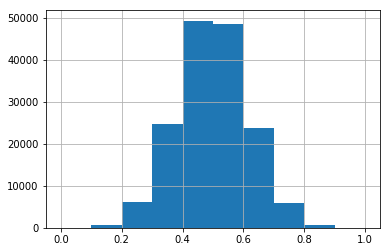

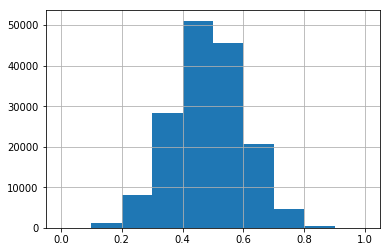

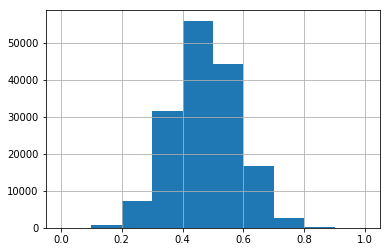

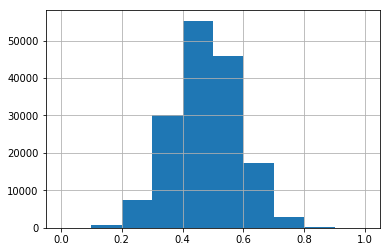

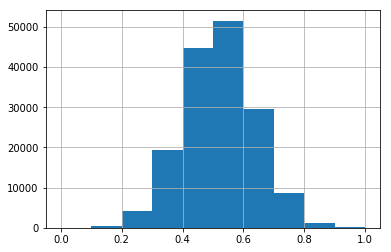

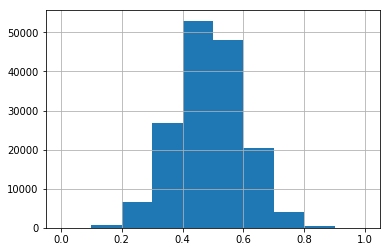

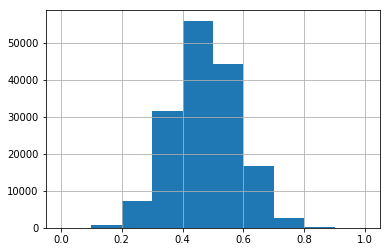

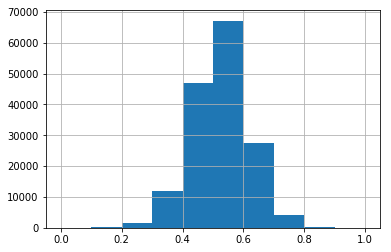

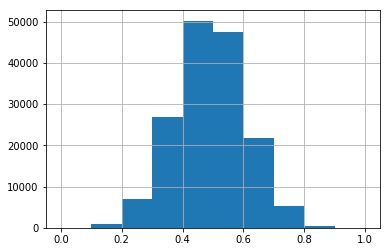

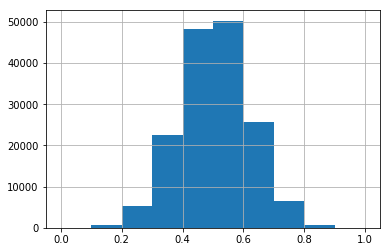

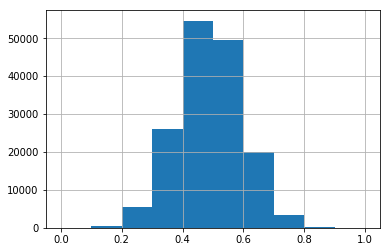

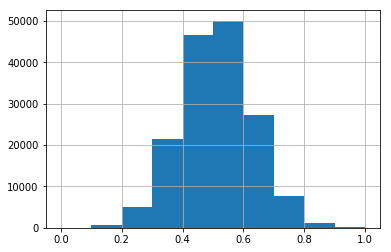

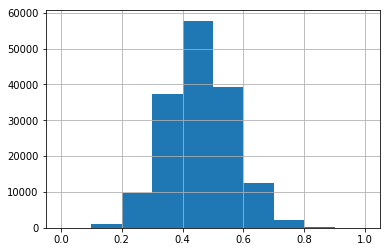

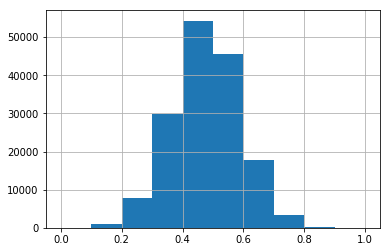

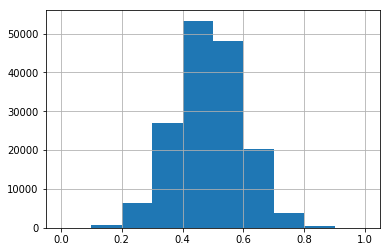

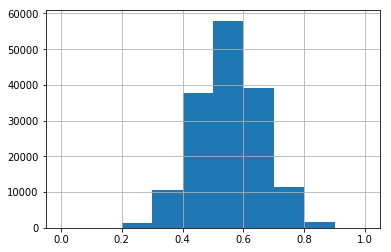

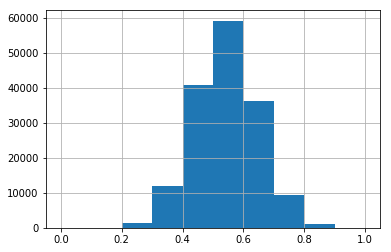

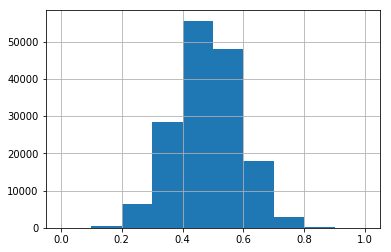

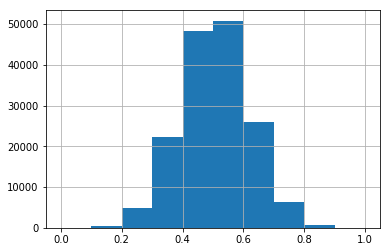

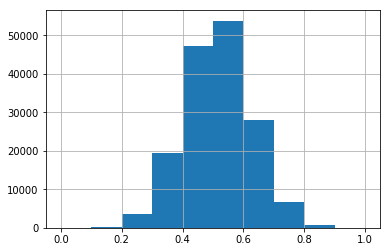

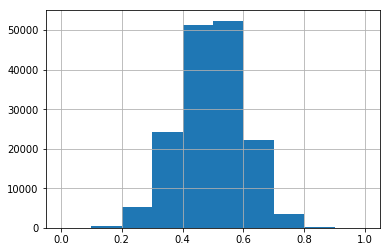

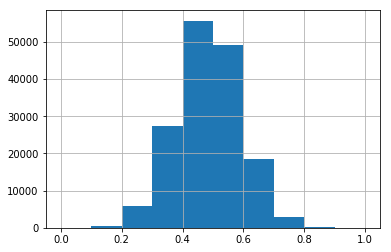

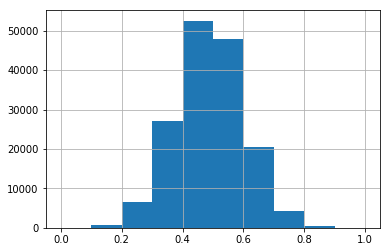

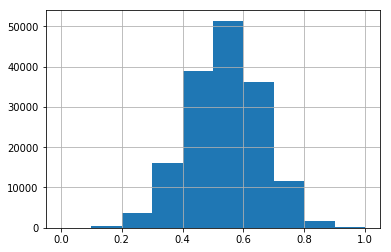

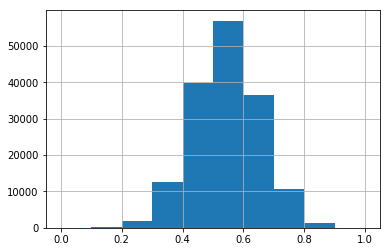

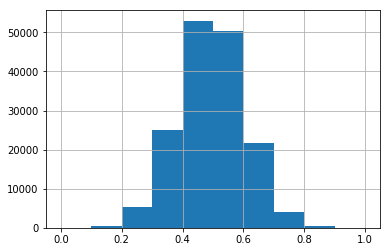

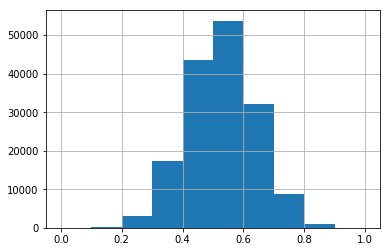

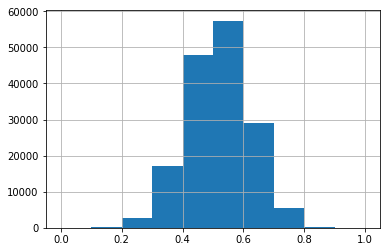

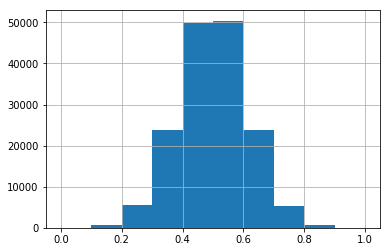

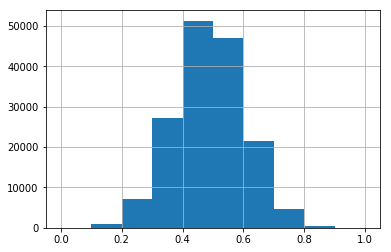

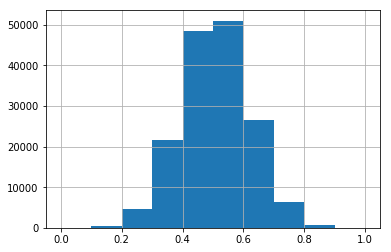

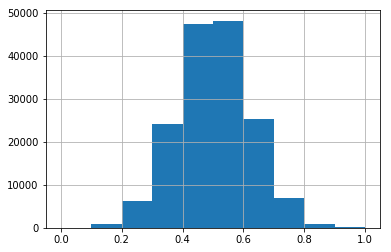

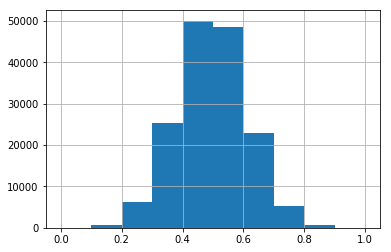

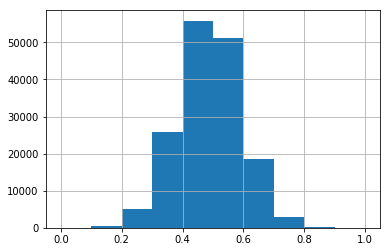

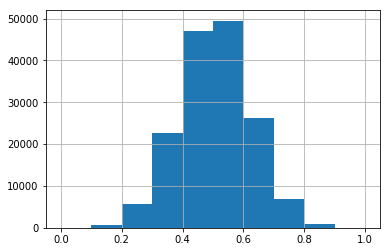

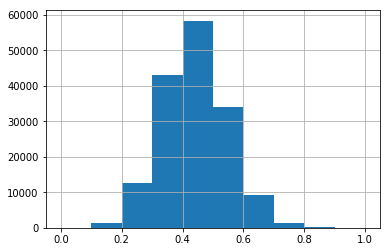

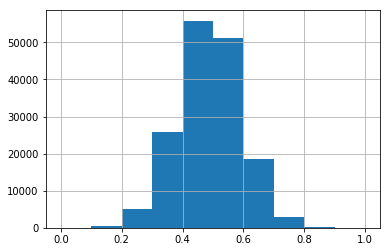

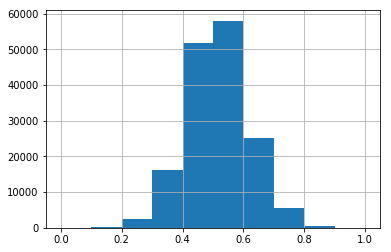

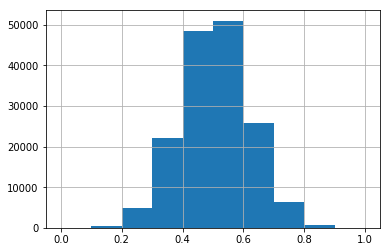

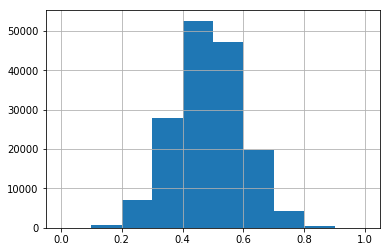

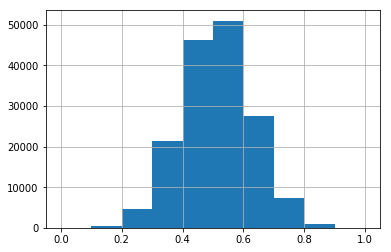

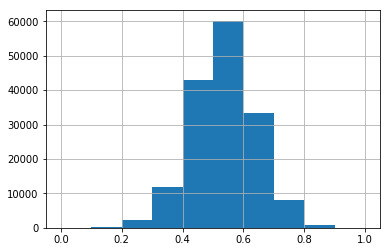

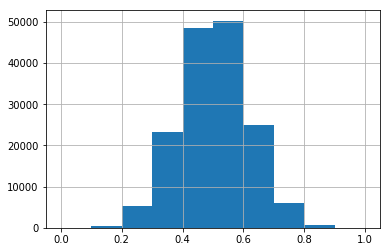

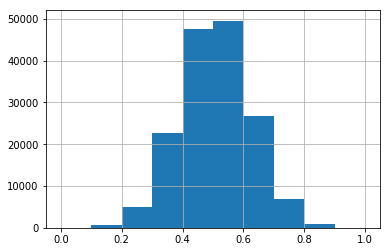

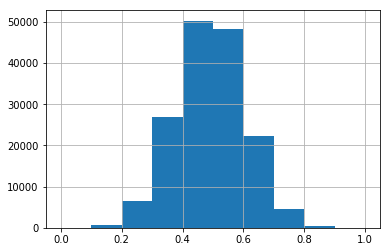

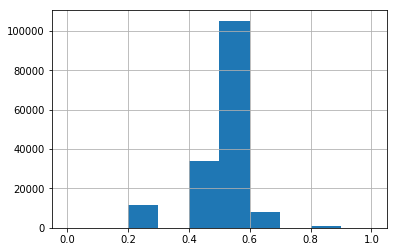

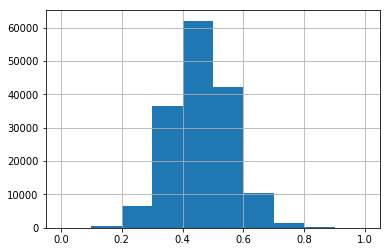

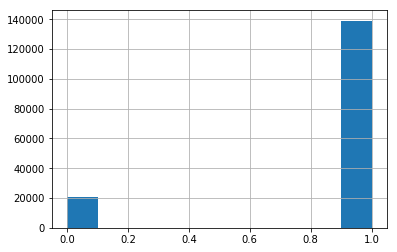

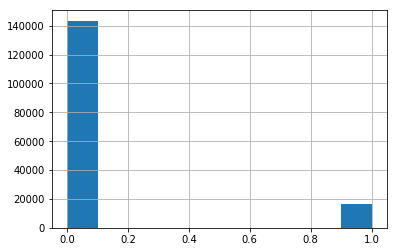

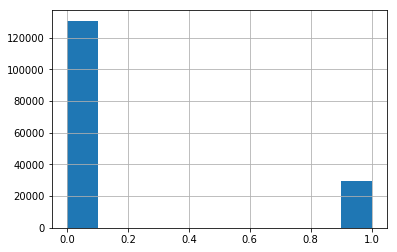

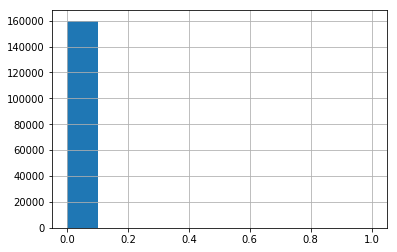

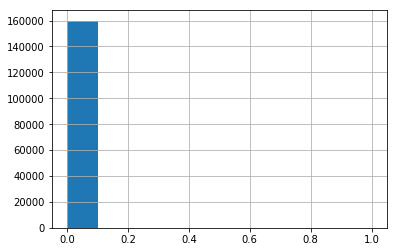

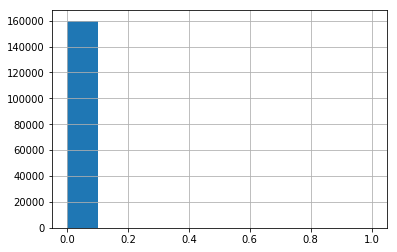

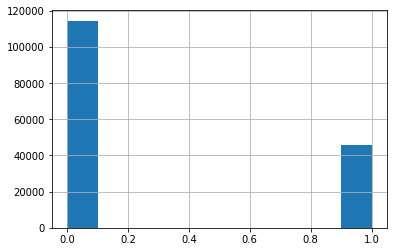

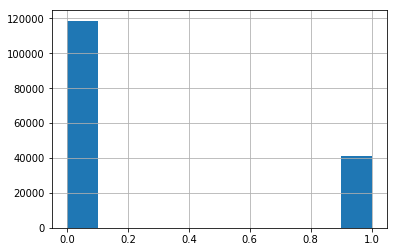

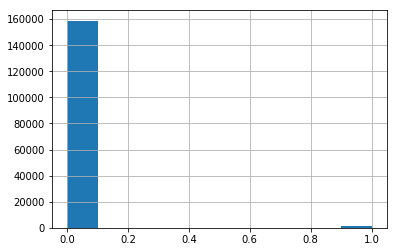

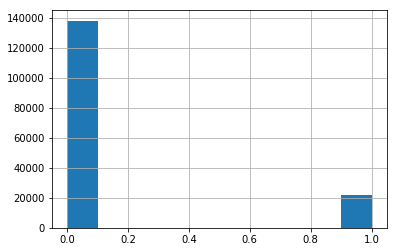

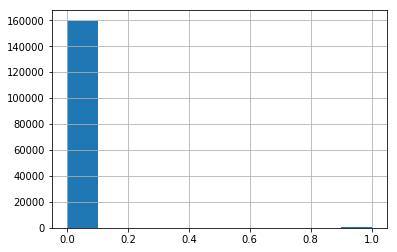

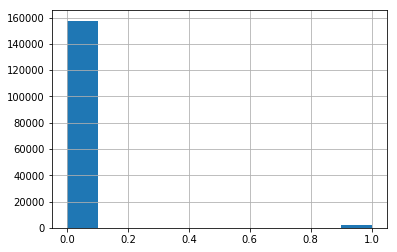

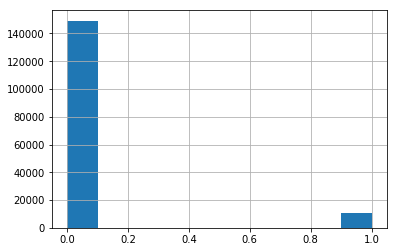

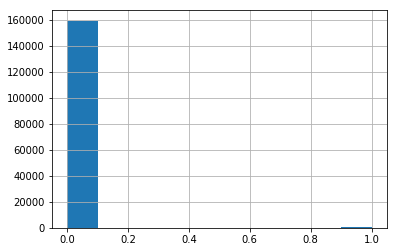

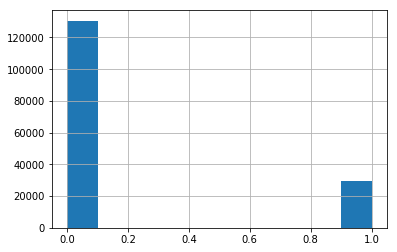

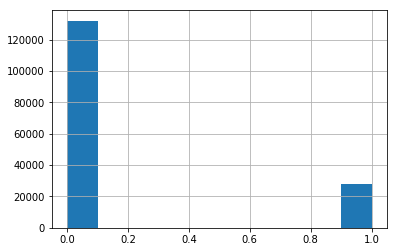

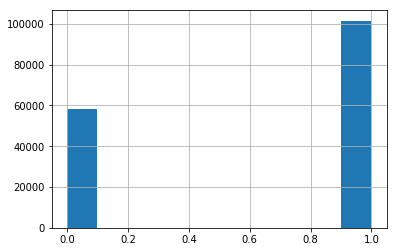

In [55]:
##scale data to check for distribution pattern
scaled_data_df = data_df.copy()
scaled_data_df.drop('y',axis=1 , inplace=True)


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(scaled_data_df)

# Print out the adjustment that the scaler applied to the total_earnings column of data
print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[12], scaler.min_[12]))
multiplied_by = scaler.scale_[12]
added = scaler.min_[12]

scaled_data_fdf = pd.DataFrame(scaled_df, columns=scaled_data_df.columns.values)

for i in scaled_data_fdf:
    scaled_data_fdf[i].hist()
    plt.show()

Scaling all the numerical data, we can see that almost all columns display a normal distribution, except for a few which also do not show high spikes. So we will replace all numerical fields with their mean value

In [56]:
data_df.isnull().sum()

x0                   26
x1                   25
x2                   38
x3                   37
x4                   26
x5                   37
x6                   26
x7                   27
x8                   21
x9                   30
x10                  43
x11                  30
x12                  36
x13                  31
x14                  34
x15                  35
x16                  26
x17                  27
x18                  40
x19                  35
x20                  38
x21                  29
x22                  27
x23                  47
x25                  22
x26                  36
x27                  30
x28                  35
x31                  39
x33                  41
                     ..
x40                  36
x41                  40
x42                  26
x43                  37
x44                  40
x45                  29
x46                  31
x47                  37
x48                  32
x49                  32
y               

In [57]:
data_df.fillna(data_df.mean(), inplace=True)

In [58]:
data_df.isnull().sum()

x0                   0
x1                   0
x2                   0
x3                   0
x4                   0
x5                   0
x6                   0
x7                   0
x8                   0
x9                   0
x10                  0
x11                  0
x12                  0
x13                  0
x14                  0
x15                  0
x16                  0
x17                  0
x18                  0
x19                  0
x20                  0
x21                  0
x22                  0
x23                  0
x25                  0
x26                  0
x27                  0
x28                  0
x31                  0
x33                  0
                    ..
x40                  0
x41                  0
x42                  0
x43                  0
x44                  0
x45                  0
x46                  0
x47                  0
x48                  0
x49                  0
y                    0
x32_mod              0
x37_mod    

In [59]:
count_no_sub = len(data_df[data_df['y']==0])
count_sub = len(data_df[data_df['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no  is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of yes", pct_of_sub*100)

percentage of no  is 59.876875
percentage of yes 40.123125


## Prepare Data for Modeling

In [120]:
def kfold_model(train_data,target_data,model,model_name):
    model_Kfold=KFold(n_splits=5,random_state=999)
    model_oof_predict=np.zeros(train_data.shape[0])
    for train_idx, test_idx in model_Kfold.split(train_data):
        model.fit(train_data.loc[train_idx],target_data.loc[train_idx])
        model_oof_predict[test_idx]=model.predict_proba(train_data.loc[test_idx])[:,1]
        print("Fold ROC score of ", model_name, "is %f" % (roc_auc_score(target_data[test_idx],model_oof_predict[test_idx])))
    print(type(model_oof_predict[test_idx]))
    return roc_auc_score(target_data[test_idx],model_oof_predict[test_idx]),model_oof_predict


def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])


def cost_of_error(fp,fn):
    unitcost_fp=100
    unitcost_fn=10
    total_cost_error=(fp*unitcost_fp) + (fn * unitcost_fn)
    return human_format(total_cost_error)

def get_confusion_matrix(train_data,target_data,model,model_name):
#    model.fit(train_data,target_data)
    model_pred=model.predict(train_data)

    model_confusion_matrix = confusion_matrix(target_data, model_pred)
    print("confusion matrix for ",model_name , " : ")
    print(model_confusion_matrix)
    
    tn, fp, fn, tp = model_confusion_matrix.ravel()
    print("tn ", tn)
    print("fp ", fp)
    print("fn ", fn)
    print("tp ", tp)

    ax= plt.subplot()
    sns.heatmap(model_confusion_matrix, annot=True, ax = ax); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);
    
    print("cost_of error is : ",cost_of_error(fp,fn))

In [60]:

train_data=data_df.copy()
train_data.drop('y',axis=1,inplace=True)
target_data=data_df['y']

In [223]:
rf_Kfold=KFold(n_splits=5)
lr_Kfold=KFold(n_splits=5)
xg_Kfold=KFold(n_splits=5)


In [232]:
for train_idx, test_idx in lr_Kfold.split(train_data):
    print("TRAIN:", train_idx, "TEST:", test_idx)


TRAIN: [ 32000  32001  32002 ... 159997 159998 159999] TEST: [    0     1     2 ... 31997 31998 31999]
TRAIN: [     0      1      2 ... 159997 159998 159999] TEST: [32000 32001 32002 ... 63997 63998 63999]
TRAIN: [     0      1      2 ... 159997 159998 159999] TEST: [64000 64001 64002 ... 95997 95998 95999]
TRAIN: [     0      1      2 ... 159997 159998 159999] TEST: [ 96000  96001  96002 ... 127997 127998 127999]
TRAIN: [     0      1      2 ... 127997 127998 127999] TEST: [128000 128001 128002 ... 159997 159998 159999]


<a id="logregcode"></a>
<div style="text-align: right"><a href="#logregresults">Back to Results</a></div>

### Logistic Regression Classifier

In [236]:
logreg = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=1.0,class_weight=None, random_state=999, solver='liblinear'))

In [241]:
logreg_oof_predict=np.zeros(data.shape[0])
for train_idx, test_idx in lr_Kfold.split(data):
    logreg.fit(train_data.loc[train_idx],target_data.loc[train_idx])
    logreg_oof_predict[test_idx]=logreg.predict_proba(train_data.loc[test_idx])[:,1]
    print("Fold ROC score of Logistic Regression is %f" % roc_auc_score(target_data[test_idx],logreg_oof_predict[test_idx]))

Fold ROC score is 0.755049
Fold ROC score is 0.759732
Fold ROC score is 0.759826
Fold ROC score is 0.761421
Fold ROC score is 0.759681


In [324]:
Lr_oof_predict1=np.zeros(train_data.shape[0])
logreg1 = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=0.8,class_weight='balanced', random_state=999, solver='saga'))
Lr_auc_score1,Lr_oof_predict1=kfold_model(train_data,target_data,logreg1,'Logistic REgression Hypertuned Model')

/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fold ROC score of  Logistic REgression Hypertuned Model is 0.755855


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fold ROC score of  Logistic REgression Hypertuned Model is 0.760594


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fold ROC score of  Logistic REgression Hypertuned Model is 0.760667


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fold ROC score of  Logistic REgression Hypertuned Model is 0.762029
Fold ROC score of  Logistic REgression Hypertuned Model is 0.760589
<class 'numpy.ndarray'>


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [326]:
print(len(Lr_oof_predict1))

160000


In [329]:
Lr_oof_predict2=np.zeros(train_data.shape[0])
logreg2 = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=0.6,class_weight='balanced', random_state=999, solver='saga'))
Lr_auc_score2,Lr_oof_predict2=kfold_model(train_data,target_data,logreg2,'Logistic REgression Hypertuned Model')
print(len(Lr_oof_predict2))

/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fold ROC score of  Logistic REgression Hypertuned Model is 0.755855


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fold ROC score of  Logistic REgression Hypertuned Model is 0.760595


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fold ROC score of  Logistic REgression Hypertuned Model is 0.760667


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Fold ROC score of  Logistic REgression Hypertuned Model is 0.762030
Fold ROC score of  Logistic REgression Hypertuned Model is 0.760590
<class 'numpy.ndarray'>
160000


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [330]:
Lr_oof_predict3=np.zeros(train_data.shape[0])
logreg3 = make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', C=0.6,class_weight='balanced', random_state=999, solver='liblinear'))
Lr_auc_score3,Lr_oof_predict3=kfold_model(train_data,target_data,logreg3,'Logistic REgression Hypertuned Model')
print(len(Lr_oof_predict3))

Fold ROC score of  Logistic REgression Hypertuned Model is 0.755869
Fold ROC score of  Logistic REgression Hypertuned Model is 0.760585
Fold ROC score of  Logistic REgression Hypertuned Model is 0.760684
Fold ROC score of  Logistic REgression Hypertuned Model is 0.762009
Fold ROC score of  Logistic REgression Hypertuned Model is 0.760555
<class 'numpy.ndarray'>
160000


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [331]:
Lr_oof_predict4=np.zeros(train_data.shape[0])
logreg4 = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=0.6,class_weight='balanced', random_state=999, solver='liblinear'))
Lr_auc_score4,Lr_oof_predict4=kfold_model(train_data,target_data,logreg4,'Logistic REgression Hypertuned Model')
print(len(Lr_oof_predict4))

Fold ROC score of  Logistic REgression Hypertuned Model is 0.755823
Fold ROC score of  Logistic REgression Hypertuned Model is 0.760525
Fold ROC score of  Logistic REgression Hypertuned Model is 0.760684
Fold ROC score of  Logistic REgression Hypertuned Model is 0.761986
Fold ROC score of  Logistic REgression Hypertuned Model is 0.760514
<class 'numpy.ndarray'>
160000


The best score we are getting from Logistic Regression is around 0.76 . So we will try other models for improvement

confusion matrix for  logistic_regression  : 
[[69666 26137]
 [20482 43715]]
tn  69666
fp  26137
fn  20482
tp  43715
cost_of error is :  2.82M


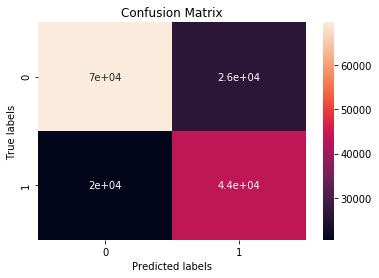

In [357]:
get_confusion_matrix(train_data,target_data,logreg4,'logistic_regression')

<a id="randomforestcode"></a>
<div style="text-align: right"><a href="#randomforestresults">Back to Results</a></div>

#### RandomForestClassifier

In [246]:
baseRfModel = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1,  class_weight='balanced'))

In [247]:
baseRf_oof_predict=np.zeros(data.shape[0])
for train_idx, test_idx in rf_Kfold.split(data):
    baseRfModel.fit(train_data.loc[train_idx],target_data.loc[train_idx])
    baseRf_oof_predict[test_idx]=baseRfModel.predict_proba(train_data.loc[test_idx])[:,1]
    print("Fold ROC score of RandomForest is %f" % roc_auc_score(target_data[test_idx],baseRf_oof_predict[test_idx]))

Fold ROC score is 0.954017
Fold ROC score is 0.956816
Fold ROC score is 0.956838
Fold ROC score is 0.955238
Fold ROC score is 0.952787


**Performing Hyperparameters Tuning using RandomSearchCV**

StratifiedKFold(n_splits=5, random_state=999, shuffle=False)
{'randomforestclassifier__n_estimators': [1, 6, 11, 17, 22, 28, 33, 39, 44, 50], 'randomforestclassifier__max_features': ['auto', 'sqrt'], 'randomforestclassifier__max_depth': [2, 6, 11, 15, 20, None], 'randomforestclassifier__min_samples_split': [2, 5, 10, 15], 'randomforestclassifier__class_weight': ['balanced', 'balanced_subsample', None], 'randomforestclassifier__bootstrap': [True, False]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 32.4min finished
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


The best parameters are {'randomforestclassifier__n_estimators': 28, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__class_weight': 'balanced_subsample', 'randomforestclassifier__bootstrap': False} with a score of 0.93


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


confusion matrix for  RandomForest Randomgrid  : 
[[27432  1148]
 [ 2742 16678]]
tn  27432
fp  1148
fn  2742
tp  16678
cost_of error is :  142.22K


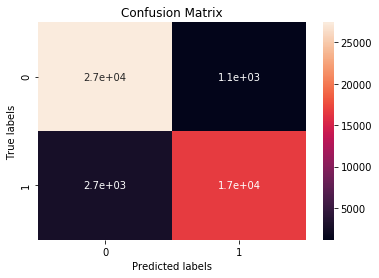

In [123]:
X_rf = data_df.copy()
X_rf.drop('y',axis=1 , inplace=True)
y_rf=data_df['y'].values

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=999)



# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into
# training and testing splits
num_cv_iterations = 5
stratifiedKfold_cv_object = StratifiedKFold(n_splits=num_cv_iterations, random_state=999)
                        
print(stratifiedKfold_cv_object)

testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]


scorers = {'precision_score': make_scorer(precision_score),'recall_score': make_scorer(recall_score),'accuracy_score': make_scorer(accuracy_score)}

#################################
# Create randomized grid
#################################

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 50, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]

#Class weights
class_weight = ['balanced', 'balanced_subsample', None]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_features': max_features,
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__min_samples_split': min_samples_split,
               'randomforestclassifier__class_weight': class_weight,
               'randomforestclassifier__bootstrap': bootstrap}

print(random_grid)


#################################
# Random Search Training
#################################

# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestClassifier() #Originally was this
rf1 = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1)) 

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf1_randomgrid = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                                   n_iter = 100, 
                                   cv = stratifiedKfold_cv_object,
                                   verbose=2, 
                                   random_state=999, 
                                   n_jobs = -1,
                                   scoring=scorers,
                                   refit='precision_score', \
                                   return_train_score=True)


# Fit the random search model
rf1_randomgrid.fit(X_train_rf, y=y_train_rf)

print("The best parameters are %s with a score of %0.2f"
      % (rf1_randomgrid.best_params_, rf1_randomgrid.best_score_))
#rf_random.best_params_

get_confusion_matrix(X_test_rf,y_test_rf,rf1_randomgrid,'RandomForest Randomgrid')

RandomGridsearch on RandomForest model returned below as best parameters :
    
    The best parameters are {'randomforestclassifier__n_estimators': 28, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__class_weight': 'balanced_subsample', 'randomforestclassifier__bootstrap': False} with a score of 0.93

In [124]:
Rf_oof_predict2=np.zeros(train_data.shape[0])
RfModel2 = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=999, n_jobs=-1,  class_weight='balanced',n_estimators=28,min_samples_split=2,max_features='auto',max_depth=None,bootstrap=False))
Rf_auc_score2,Rf_oof_predict2=kfold_model(train_data,target_data,RfModel2,'RandomForest Hypertuned Model')
print(len(Rf_oof_predict2))

/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Fold ROC score of  RandomForest Hypertuned Model is 0.972470


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Fold ROC score of  RandomForest Hypertuned Model is 0.976527


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Fold ROC score of  RandomForest Hypertuned Model is 0.974302


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Fold ROC score of  RandomForest Hypertuned Model is 0.973150


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Fold ROC score of  RandomForest Hypertuned Model is 0.973763
<class 'numpy.ndarray'>
160000


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


**Use our best RandomForest Model to calculate Loss**

/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


confusion matrix for  RandomForest  : 
[[94973   830]
 [ 1732 62465]]
tn  94973
fp  830
fn  1732
tp  62465
cost_of error is :  100.32K


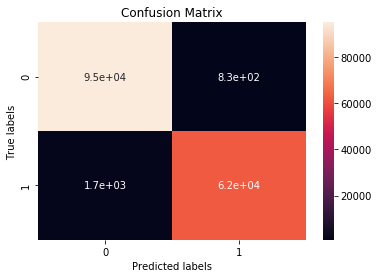

In [125]:
get_confusion_matrix(train_data,target_data,RfModel2,'RandomForest')

<a id="xgboostcode"></a>
<div style="text-align: right"><a href="#xgboostresults">Back to Results</a></div>

###  XGBoost Classifier

In [58]:
X_xg = data_df.copy()
X_xg.drop('y',axis=1 , inplace=True)
y_xg=data_df['y'].values

In [60]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_xg_train, X_xg_test, y__xg_train, y_xg_test = train_test_split(X_xg, y_xg, test_size=test_size, random_state=seed)

In [61]:
model = XGBClassifier()
model.fit(X_xg, y_xg)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [62]:
# make predictions for test data
y_xg_pred = model.predict(X_xg_test)
predictions = [round(value) for value in y_xg_pred]

In [63]:
# evaluate predictions
accuracy = accuracy_score(y_xg_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.50%


In [136]:
xgb_oof_predict=np.zeros(train_data.shape[0])
xgb_bmodel=XGBClassifier(random_state=999, objective= 'binary:logistic',n_jobs=-1)
xgb_auc_score,xgb_oof_predict=kfold_model(train_data,target_data,xgb_bmodel,'XGBoost Base Model')
print(len(xgb_oof_predict))

Fold ROC score of  XGBoost Base Model is 0.905814
Fold ROC score of  XGBoost Base Model is 0.914411
Fold ROC score of  XGBoost Base Model is 0.910586
Fold ROC score of  XGBoost Base Model is 0.913368
Fold ROC score of  XGBoost Base Model is 0.911965
<class 'numpy.ndarray'>
160000


confusion matrix for  XGBoost  : 
[[86146  9657]
 [16134 48063]]
tn  86146
fp  9657
fn  16134
tp  48063
cost_of error is :  1.13M


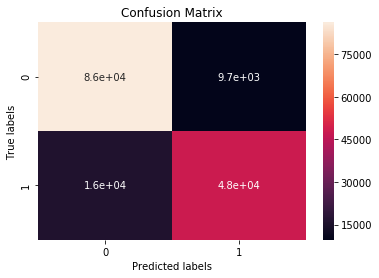

In [137]:
get_confusion_matrix(train_data,target_data,xgb_bmodel,'XGBoost')

In [134]:
xgb_oof_predict2=np.zeros(train_data.shape[0])
xgb_model2=XGBClassifier(random_state=999, objective= 'binary:logistic',n_jobs=-1,n_estimators=400,learning_rate=0.1)
xgb_auc_score2,xgb_oof_predict2=kfold_model(train_data,target_data,xgb_model2,'XGBoost Hypertuned Model')
print(len(xgb_oof_predict2))

Fold ROC score of  XGBoost Hypertuned Model is 0.949370
Fold ROC score of  XGBoost Hypertuned Model is 0.952216
Fold ROC score of  XGBoost Hypertuned Model is 0.951970
Fold ROC score of  XGBoost Hypertuned Model is 0.951055
Fold ROC score of  XGBoost Hypertuned Model is 0.951923
<class 'numpy.ndarray'>
160000


confusion matrix for  XGBoost  : 
[[88725  7078]
 [10201 53996]]
tn  88725
fp  7078
fn  10201
tp  53996
cost_of error is :  809.81K


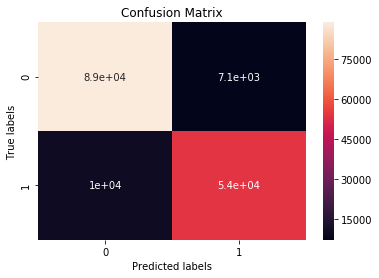

In [135]:
get_confusion_matrix(train_data,target_data,xgb_model2,'XGBoost')

In [105]:
xgb_oof_predict1=np.zeros(train_data.shape[0])
xgb_model=XGBClassifier(random_state=999, objective= 'binary:logistic',n_jobs=-1,n_estimators=400,max_depth=15,learning_rate=0.1)
xgb_auc_score1,xgb_oof_predict1=kfold_model(train_data,target_data,xgb_model,'XGBoost Hypertuned Model')
print(len(xgb_oof_predict1))

Fold ROC score of  XGBoost Hypertuned Model is 0.985109
Fold ROC score of  XGBoost Hypertuned Model is 0.987481
Fold ROC score of  XGBoost Hypertuned Model is 0.986342
Fold ROC score of  XGBoost Hypertuned Model is 0.985448
Fold ROC score of  XGBoost Hypertuned Model is 0.985243
<class 'numpy.ndarray'>
160000


confusion matrix for  XGBoost  : 
[[95803     0]
 [    0 64197]]
tn  95803
fp  0
fn  0
tp  64197
cost_of error is :  0.00


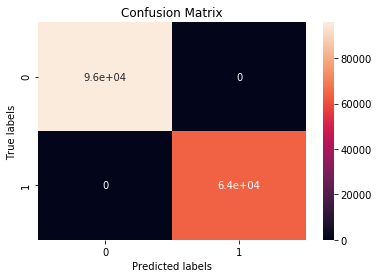

In [359]:
get_confusion_matrix(train_data,target_data,xgb_model,'XGBoost')

<a id="lgbcode"></a>
<div style="text-align: right"><a href="#lgbresults">Back to Results</a></div>

### LightGBM  model

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8, total=   9.1s
[CV] subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.0s remaining:    0.0s


[CV]  subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8, total=   9.5s
[CV] subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8, total=   9.2s
[CV] subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8, total=  10.4s
[CV] subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_b

[CV]  subsample_freq=20, subsample=0.7, reg_lambda=1.2, reg_alpha=1.1, num_leaves=100, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8, total=  11.3s
[CV] subsample_freq=20, subsample=0.7, reg_lambda=1.2, reg_alpha=1.1, num_leaves=100, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.7, reg_lambda=1.2, reg_alpha=1.1, num_leaves=100, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8, total=   9.2s
[CV] subsample_freq=20, subsample=0.7, reg_lambda=1.2, reg_alpha=1.1, num_leaves=100, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.7, reg_lambda=1.2, reg_alpha=1.1, num_leaves=100, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8, total=   8.9s
[CV] subsample_freq=20, subsample=0.7, reg_lambda=1.2, reg_alpha=1.1, num_leaves=100, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_b

[CV]  subsample_freq=20, subsample=0.7, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=700, min_split_gain=0.3, max_depth=20, colsample_bytree=0.8, total=   9.0s
[CV] subsample_freq=20, subsample=0.7, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=700, min_split_gain=0.3, max_depth=20, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.7, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=700, min_split_gain=0.3, max_depth=20, colsample_bytree=0.8, total=   9.1s
[CV] subsample_freq=20, subsample=0.7, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=700, min_split_gain=0.3, max_depth=20, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.7, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=700, min_split_gain=0.3, max_depth=20, colsample_bytree=0.8, total=   9.6s
[CV] subsample_freq=20, subsample=0.7, reg_lambda=1.1, reg_alpha=1.1, num_leaves=200, n_estimators=700, min_split_gain=0.3, max_depth=20, colsample_bytree=

[CV]  subsample_freq=20, subsample=0.7, reg_lambda=1.1, reg_alpha=1.2, num_leaves=50, n_estimators=1000, min_split_gain=0.3, max_depth=15, colsample_bytree=0.8, total=  13.2s
[CV] subsample_freq=20, subsample=0.7, reg_lambda=1.1, reg_alpha=1.2, num_leaves=50, n_estimators=1000, min_split_gain=0.3, max_depth=15, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.7, reg_lambda=1.1, reg_alpha=1.2, num_leaves=50, n_estimators=1000, min_split_gain=0.3, max_depth=15, colsample_bytree=0.8, total=  12.7s
[CV] subsample_freq=20, subsample=0.7, reg_lambda=1.1, reg_alpha=1.2, num_leaves=50, n_estimators=1000, min_split_gain=0.3, max_depth=15, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.7, reg_lambda=1.1, reg_alpha=1.2, num_leaves=50, n_estimators=1000, min_split_gain=0.3, max_depth=15, colsample_bytree=0.8, total=  13.6s
[CV] subsample_freq=20, subsample=0.7, reg_lambda=1.1, reg_alpha=1.2, num_leaves=50, n_estimators=1000, min_split_gain=0.3, max_depth=15, colsample_bytree=

[CV]  subsample_freq=20, subsample=0.9, reg_lambda=1.2, reg_alpha=1.3, num_leaves=50, n_estimators=400, min_split_gain=0.4, max_depth=15, colsample_bytree=0.7, total=   6.4s
[CV] subsample_freq=20, subsample=0.9, reg_lambda=1.2, reg_alpha=1.3, num_leaves=50, n_estimators=400, min_split_gain=0.4, max_depth=15, colsample_bytree=0.7 
[CV]  subsample_freq=20, subsample=0.9, reg_lambda=1.2, reg_alpha=1.3, num_leaves=50, n_estimators=400, min_split_gain=0.4, max_depth=15, colsample_bytree=0.7, total=   6.5s
[CV] subsample_freq=20, subsample=0.9, reg_lambda=1.2, reg_alpha=1.3, num_leaves=50, n_estimators=400, min_split_gain=0.4, max_depth=15, colsample_bytree=0.7 
[CV]  subsample_freq=20, subsample=0.9, reg_lambda=1.2, reg_alpha=1.3, num_leaves=50, n_estimators=400, min_split_gain=0.4, max_depth=15, colsample_bytree=0.7, total=   6.8s
[CV] subsample_freq=20, subsample=0.9, reg_lambda=1.2, reg_alpha=1.3, num_leaves=50, n_estimators=400, min_split_gain=0.4, max_depth=15, colsample_bytree=0.7 
[

[CV]  subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.2, num_leaves=50, n_estimators=1000, min_split_gain=0.3, max_depth=25, colsample_bytree=0.7, total=   9.7s
[CV] subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.2, num_leaves=50, n_estimators=1000, min_split_gain=0.3, max_depth=25, colsample_bytree=0.7 
[CV]  subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.2, num_leaves=50, n_estimators=1000, min_split_gain=0.3, max_depth=25, colsample_bytree=0.7, total=  10.6s
[CV] subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.2, num_leaves=50, n_estimators=1000, min_split_gain=0.3, max_depth=25, colsample_bytree=0.7 
[CV]  subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.2, num_leaves=50, n_estimators=1000, min_split_gain=0.3, max_depth=25, colsample_bytree=0.7, total=   9.6s
[CV] subsample_freq=20, subsample=0.8, reg_lambda=1.1, reg_alpha=1.2, num_leaves=50, n_estimators=1000, min_split_gain=0.3, max_depth=25, colsample_bytree=

[CV]  subsample_freq=20, subsample=0.9, reg_lambda=1.3, reg_alpha=1.2, num_leaves=200, n_estimators=400, min_split_gain=0.3, max_depth=25, colsample_bytree=0.8, total=   8.6s
[CV] subsample_freq=20, subsample=0.9, reg_lambda=1.3, reg_alpha=1.2, num_leaves=200, n_estimators=400, min_split_gain=0.3, max_depth=25, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.9, reg_lambda=1.3, reg_alpha=1.2, num_leaves=200, n_estimators=400, min_split_gain=0.3, max_depth=25, colsample_bytree=0.8, total=   8.9s
[CV] subsample_freq=20, subsample=0.9, reg_lambda=1.3, reg_alpha=1.2, num_leaves=200, n_estimators=400, min_split_gain=0.3, max_depth=25, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.9, reg_lambda=1.3, reg_alpha=1.2, num_leaves=200, n_estimators=400, min_split_gain=0.3, max_depth=25, colsample_bytree=0.8, total=   7.9s
[CV] subsample_freq=20, subsample=0.9, reg_lambda=1.3, reg_alpha=1.2, num_leaves=200, n_estimators=400, min_split_gain=0.3, max_depth=25, colsample_bytree=

[CV]  subsample_freq=20, subsample=0.8, reg_lambda=1.3, reg_alpha=1.2, num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=25, colsample_bytree=0.8, total=   7.0s
[CV] subsample_freq=20, subsample=0.8, reg_lambda=1.3, reg_alpha=1.2, num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=25, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.8, reg_lambda=1.3, reg_alpha=1.2, num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=25, colsample_bytree=0.8, total=   6.4s
[CV] subsample_freq=20, subsample=0.8, reg_lambda=1.3, reg_alpha=1.2, num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=25, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.8, reg_lambda=1.3, reg_alpha=1.2, num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=25, colsample_bytree=0.8, total=   6.4s
[CV] subsample_freq=20, subsample=0.8, reg_lambda=1.3, reg_alpha=1.2, num_leaves=50, n_estimators=400, min_split_gain=0.3, max_depth=25, colsample_bytree=0.8 
[

[CV]  subsample_freq=20, subsample=0.8, reg_lambda=1.3, reg_alpha=1.1, num_leaves=100, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8, total=   8.7s
[CV] subsample_freq=20, subsample=0.8, reg_lambda=1.3, reg_alpha=1.1, num_leaves=100, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.8, reg_lambda=1.3, reg_alpha=1.1, num_leaves=100, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8, total=   9.6s
[CV] subsample_freq=20, subsample=0.8, reg_lambda=1.3, reg_alpha=1.1, num_leaves=100, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.8, reg_lambda=1.3, reg_alpha=1.1, num_leaves=100, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_bytree=0.8, total=   9.4s
[CV] subsample_freq=20, subsample=0.8, reg_lambda=1.3, reg_alpha=1.1, num_leaves=100, n_estimators=1000, min_split_gain=0.4, max_depth=25, colsample_b

[CV]  subsample_freq=20, subsample=0.7, reg_lambda=1.2, reg_alpha=1.3, num_leaves=50, n_estimators=400, min_split_gain=0.4, max_depth=15, colsample_bytree=0.8, total=   6.6s
[CV] subsample_freq=20, subsample=0.7, reg_lambda=1.2, reg_alpha=1.3, num_leaves=50, n_estimators=400, min_split_gain=0.4, max_depth=15, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.7, reg_lambda=1.2, reg_alpha=1.3, num_leaves=50, n_estimators=400, min_split_gain=0.4, max_depth=15, colsample_bytree=0.8, total=   6.4s
[CV] subsample_freq=20, subsample=0.7, reg_lambda=1.2, reg_alpha=1.3, num_leaves=50, n_estimators=400, min_split_gain=0.4, max_depth=15, colsample_bytree=0.8 
[CV]  subsample_freq=20, subsample=0.7, reg_lambda=1.2, reg_alpha=1.3, num_leaves=50, n_estimators=400, min_split_gain=0.4, max_depth=15, colsample_bytree=0.8, total=   6.9s
[CV] subsample_freq=20, subsample=0.7, reg_lambda=1.2, reg_alpha=1.3, num_leaves=50, n_estimators=400, min_split_gain=0.4, max_depth=15, colsample_bytree=0.8 
[

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 45.3min finished


The best parameters of LightGBM are {'subsample_freq': 20, 'subsample': 0.9, 'reg_lambda': 1.3, 'reg_alpha': 1.2, 'num_leaves': 200, 'n_estimators': 400, 'min_split_gain': 0.3, 'max_depth': 25, 'colsample_bytree': 0.8} with a score of 0.93
confusion matrix for  LightGBM Randomgrid  : 
[[27385  1195]
 [ 1595 17825]]
tn  27385
fp  1195
fn  1595
tp  17825
cost_of error is :  135.45K


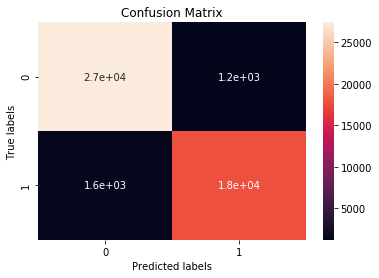

In [151]:

X_lgb = data_df.copy()
X_lgb.drop('y',axis=1 , inplace=True)
y_lgb=data_df['y'].values

X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(X_lgb, y_lgb, test_size=0.3, random_state=999)


lgb = LGBMClassifier(random_State=999,n_jobs=-1)
lgb_param_grid1 = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

scorers = {'precision_score': make_scorer(precision_score),'recall_score': make_scorer(recall_score)}


lgb_randomgrid1 = RandomizedSearchCV(
            estimator=lgb,
            param_distributions=lgb_param_grid1, 
            cv=stratifiedKfold_cv_object,
            n_iter=50, 
            scoring=scorers,
            refit='precision_score', \
            verbose=2)

# Fit the random search model
lgb_randomgrid1.fit(X_train_lgb, y=y_train_lgb)

print("The best parameters of LightGBM are %s with a score of %0.2f"
      % (lgb_randomgrid1.best_params_, lgb_randomgrid1.best_score_))



get_confusion_matrix(X_test_lgb,y_test_lgb,lgb_randomgrid1,'LightGBM Randomgrid')

The best parameters returned from RandomsearchCV on LightGBM are -

The best parameters of LightGBM are {'subsample_freq': 20, 'subsample': 0.9, 'reg_lambda': 1.3, 'reg_alpha': 1.2, 'num_leaves': 200, 'n_estimators': 400, 'min_split_gain': 0.3, 'max_depth': 25, 'colsample_bytree': 0.8} with a score of 0.93

In [152]:

lgb_oof_predict1=np.zeros(train_data.shape[0])
lgb_model=LGBMClassifier(random_State=999,n_jobs=-1,subsample_freq=20,subsample=0.9,reg_lambda=1.3,reg_alpha=1.2,num_leaves=200,n_estimators=400,min_split_gain=0.3,max_depth=25,colsample_bytree=0.8)
lgb_auc_score1,lgb_oof_predict1=kfold_model(train_data,target_data,lgb_model,'LightGBM Hypertuned Model')
print(len(lgb_oof_predict1))

Fold ROC score of  LightGBM Hypertuned Model is 0.982703
Fold ROC score of  LightGBM Hypertuned Model is 0.984918
Fold ROC score of  LightGBM Hypertuned Model is 0.983985
Fold ROC score of  LightGBM Hypertuned Model is 0.983209
Fold ROC score of  LightGBM Hypertuned Model is 0.983028
<class 'numpy.ndarray'>
160000


confusion matrix for  LightGBM  : 
[[94627  1176]
 [ 1519 62678]]
tn  94627
fp  1176
fn  1519
tp  62678
cost_of error is :  132.79K


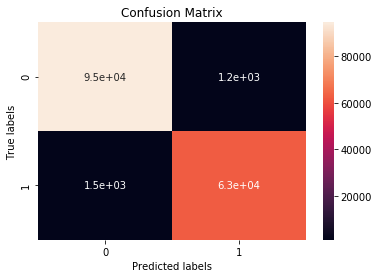

In [153]:
get_confusion_matrix(train_data,target_data,lgb_model,'LightGBM')

In [143]:
X_lgb = data_df.copy()
X_lgb.drop('y',axis=1 , inplace=True)
y_lgb=data_df['y'].values

X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(X_lgb, y_lgb, test_size=0.3, random_state=999)


lgb = LGBMClassifier(random_State=999,n_jobs=-1)
lgb_param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'num_leaves': [50, 100, 200]
}

scorers = {'precision_score': make_scorer(precision_score),'recall_score': make_scorer(recall_score)}


lgb_randomgrid = RandomizedSearchCV(
            estimator=lgb,
            param_distributions=lgb_param_grid, 
            cv=stratifiedKfold_cv_object,
            n_iter=50, 
            scoring=scorers,
            refit='precision_score', \
            verbose=2)

# Fit the random search model
lgb_randomgrid.fit(X_train_lgb, y=y_train_lgb)

print("The best parameters of LightGBM are %s with a score of %0.2f"
      % (lgb_randomgrid.best_params_, lgb_randomgrid.best_score_))




/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] num_leaves=50, n_estimators=400, colsample_bytree=0.7 ...........
[CV]  num_leaves=50, n_estimators=400, colsample_bytree=0.7, total=   5.4s
[CV] num_leaves=50, n_estimators=400, colsample_bytree=0.7 ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV]  num_leaves=50, n_estimators=400, colsample_bytree=0.7, total=   5.2s
[CV] num_leaves=50, n_estimators=400, colsample_bytree=0.7 ...........
[CV]  num_leaves=50, n_estimators=400, colsample_bytree=0.7, total=   5.2s
[CV] num_leaves=50, n_estimators=400, colsample_bytree=0.7 ...........
[CV]  num_leaves=50, n_estimators=400, colsample_bytree=0.7, total=   5.5s
[CV] num_leaves=50, n_estimators=400, colsample_bytree=0.7 ...........
[CV]  num_leaves=50, n_estimators=400, colsample_bytree=0.7, total=   6.0s
[CV] num_leaves=100, n_estimators=400, colsample_bytree=0.7 ..........
[CV]  num_leaves=100, n_estimators=400, colsample_bytree=0.7, total=   8.3s
[CV] num_leaves=100, n_estimators=400, colsample_bytree=0.7 ..........
[CV]  num_leaves=100, n_estimators=400, colsample_bytree=0.7, total=   9.0s
[CV] num_leaves=100, n_estimators=400, colsample_bytree=0.7 ..........
[CV]  num_leaves=100, n_estimators=400, colsample_bytree=0.7, total=   8.2s
[CV] num_leaves=100, n_estimators=400, colsamp

[CV]  num_leaves=200, n_estimators=400, colsample_bytree=0.8, total=  12.6s
[CV] num_leaves=200, n_estimators=400, colsample_bytree=0.8 ..........
[CV]  num_leaves=200, n_estimators=400, colsample_bytree=0.8, total=  12.5s
[CV] num_leaves=200, n_estimators=400, colsample_bytree=0.8 ..........
[CV]  num_leaves=200, n_estimators=400, colsample_bytree=0.8, total=  12.6s
[CV] num_leaves=50, n_estimators=700, colsample_bytree=0.8 ...........
[CV]  num_leaves=50, n_estimators=700, colsample_bytree=0.8, total=   7.3s
[CV] num_leaves=50, n_estimators=700, colsample_bytree=0.8 ...........
[CV]  num_leaves=50, n_estimators=700, colsample_bytree=0.8, total=   7.4s
[CV] num_leaves=50, n_estimators=700, colsample_bytree=0.8 ...........
[CV]  num_leaves=50, n_estimators=700, colsample_bytree=0.8, total=   7.4s
[CV] num_leaves=50, n_estimators=700, colsample_bytree=0.8 ...........
[CV]  num_leaves=50, n_estimators=700, colsample_bytree=0.8, total=   7.3s
[CV] num_leaves=50, n_estimators=700, colsampl

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 26.4min finished


The best parameters of LightGBM are {'num_leaves': 200, 'n_estimators': 1000, 'colsample_bytree': 0.8} with a score of 0.94


NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

Best model parematers returned by above random grid search on LightGBM are below -
The best parameters of LightGBM are {'num_leaves': 200, 'n_estimators': 1000, 'colsample_bytree': 0.8} with a score of 0.94

confusion matrix for  LightGBM Randomgrid  : 
[[27573  1007]
 [ 1396 18024]]
tn  27573
fp  1007
fn  1396
tp  18024
cost_of error is :  114.66K


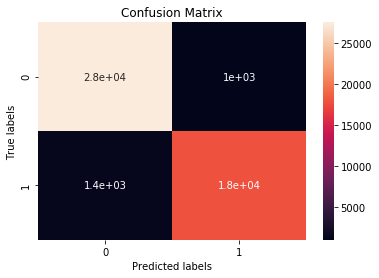

In [145]:
get_confusion_matrix(X_test_lgb,y_test_lgb,lgb_randomgrid,'LightGBM Randomgrid')

In [146]:
lgb_oof_predict2=np.zeros(train_data.shape[0])
lgb_model2=LGBMClassifier(random_State=999,n_jobs=-1,num_leaves=200,n_estimators=1000,colsample_bytree=0.8)
lgb_auc_score2,lgb_oof_predict2=kfold_model(train_data,target_data,lgb_model2,'LightGBM Hypertuned Model')
print(len(lgb_oof_predict2))

Fold ROC score of  LightGBM Hypertuned Model is 0.985644
Fold ROC score of  LightGBM Hypertuned Model is 0.987727
Fold ROC score of  LightGBM Hypertuned Model is 0.986364
Fold ROC score of  LightGBM Hypertuned Model is 0.986113
Fold ROC score of  LightGBM Hypertuned Model is 0.985878
<class 'numpy.ndarray'>
160000


confusion matrix for  LightGBM Randomgrid  : 
[[95063   740]
 [  885 63312]]
tn  95063
fp  740
fn  885
tp  63312
cost_of error is :  82.85K


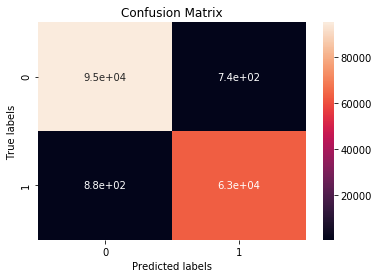

In [147]:
get_confusion_matrix(train_data,target_data,lgb_model2,'LightGBM Randomgrid')

<a id="votingcode"></a>
<div style="text-align: right"><a href="#votingresults">Back to Results</a></div>

### Ensemble using VotingClassifier

In [139]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

vclf1 = VotingClassifier(estimators=[('rf', RfModel2), ('xgb', xgb_model2), ('lgb', lgb_model)], voting='soft')
vclf_auc_score1,vclf_oof_predict1=kfold_model(train_data,target_data,vclf1,'VotingEnsemble Model')
print(len(vclf_oof_predict1))

/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Fold ROC score of  VotingEnsemble Model is 0.977498


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Fold ROC score of  VotingEnsemble Model is 0.980578


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Fold ROC score of  VotingEnsemble Model is 0.979261


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Fold ROC score of  VotingEnsemble Model is 0.978097


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Fold ROC score of  VotingEnsemble Model is 0.978541
<class 'numpy.ndarray'>
160000


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


confusion matrix for  VotingEnsemble  : 
[[94772  1031]
 [ 1510 62687]]
tn  94772
fp  1031
fn  1510
tp  62687
cost_of error is :  118.20K


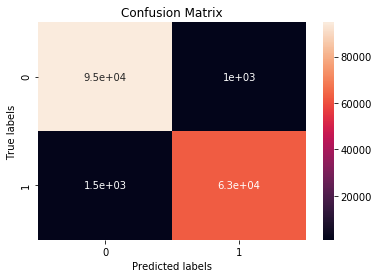

In [140]:
get_confusion_matrix(train_data,target_data,vclf1,'VotingEnsemble')

In [148]:
vclf2 = VotingClassifier(estimators=[('rf', RfModel2), ('lgb', lgb_model2)], voting='soft')
vclf_auc_score2,vclf_oof_predict2=kfold_model(train_data,target_data,vclf2,'VotingEnsemble Model')
print(len(vclf_oof_predict2))

/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Fold ROC score of  VotingEnsemble Model is 0.981763


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Fold ROC score of  VotingEnsemble Model is 0.984558


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Fold ROC score of  VotingEnsemble Model is 0.982768


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Fold ROC score of  VotingEnsemble Model is 0.982278


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Fold ROC score of  VotingEnsemble Model is 0.982666
<class 'numpy.ndarray'>
160000


/Users/tanviarora/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:381: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


confusion matrix for  VotingEnsemble  : 
[[95078   725]
 [  949 63248]]
tn  95078
fp  725
fn  949
tp  63248
cost_of error is :  81.99K


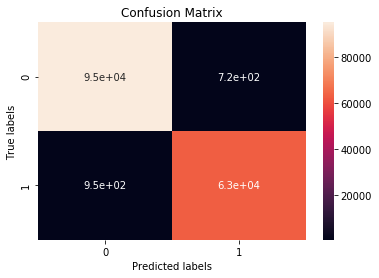

In [149]:
get_confusion_matrix(train_data,target_data,vclf2,'VotingEnsemble')